In [1]:
%matplotlib inline

# STATIC SAX TUTORIAL
In order to really get how SAX algorithm works, we popose were a detailed tutorial of how it works. In this section we will use really simple (and non realistic) data. The following example is leaning on __static_SAX__ file in __script__ folder of our repository. If you're already familiar with this algorithm and you are juste curious to see what happens on real EEGdata, please go to the second section.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.stats import norm
sys.path.append("..")
from script.static_SAX import clean_outliers, znormalization, paa_transform,paa_to_alphabet, sax_transform

# STATIC SAX ON SIMPLE DATA

In [3]:
data1 = np.asarray([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34, 1.42, 3.68, 5.65, 4.23, 6.81])
data2 = np.asarray([0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72, 1.02, 4.56, 3.21, 5.51, 4.95])
time_series = np.asarray([data1,data2])

So we have here a numpy array of two (very simple) time series. What about plotting our data just to see what it's look like ?

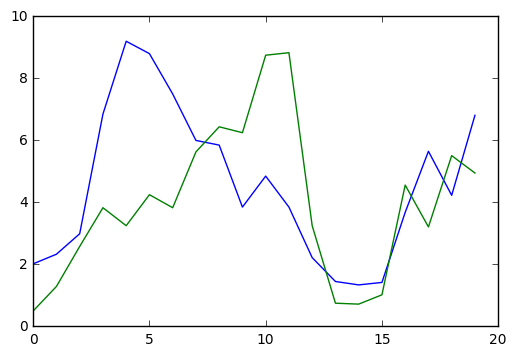

In [4]:
plt.plot(range(time_series.shape[1]),time_series[0,:])
plt.plot(range(time_series.shape[1]),time_series[1,:])

Here we have two signals with more or less the same amplitude. But in general, we prefer normalize these data.

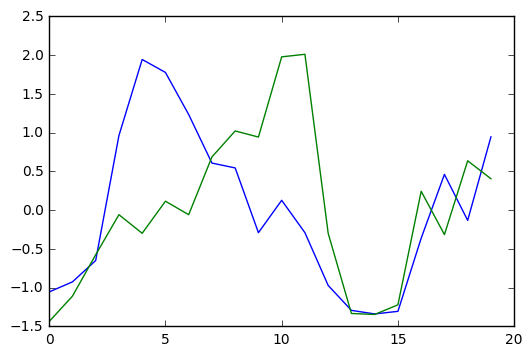

In [5]:
ztime_serie = znormalization(time_series)
plt.plot(range(ztime_serie.shape[1]),ztime_serie[0,:])
plt.plot(range(ztime_serie.shape[1]),ztime_serie[1,:])

Nothing surprising so far, the global trend has not changed because we just centered and reduced data. We will now perform PAA transformation using 4 intervals and plot the result on top of the real curve.

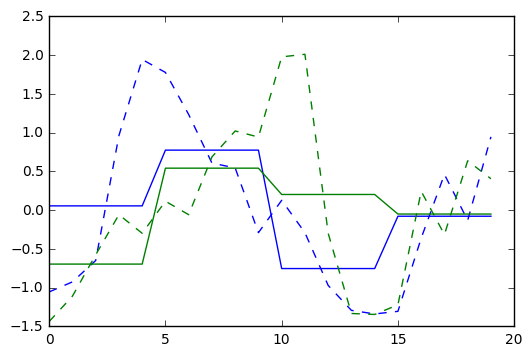

In [6]:
transform1 = paa_transform(ztime_serie, 4)
plt.plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform1, ztime_serie.shape[1]/4, axis = 1)[0,:], 'b')
plt.plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform1, ztime_serie.shape[1]/4, axis = 1)[1,:], 'g')

The truth is that having this kind of discretization is disappointing since we loose a lot of information... But to really get the importance of the __discretization parameter__ we will try again with something like 10 intervals ! 

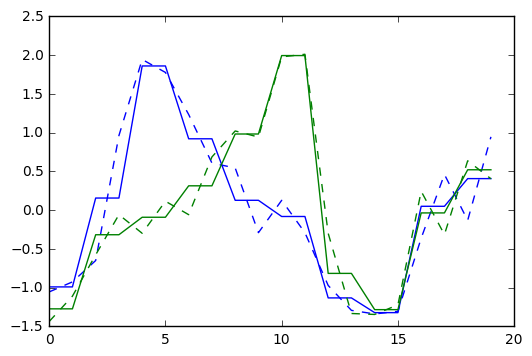

In [7]:
transform2 = paa_transform(ztime_serie, 10)
plt.plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform2, ztime_serie.shape[1]/10, axis = 1)[0,:], 'b')
plt.plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform2, ztime_serie.shape[1]/10, axis = 1)[1,:], 'g')

Now the discretization fits much more better our curves. So our discretization will contains the nearly the same information than original data. Note that in our first exemple we had only 4 *points* and that now we have 10 _points_ so 2 times less than in the original data.
Now we have a discretization containing a good beahviour of the original signal, we will transform it into an alphabet. 
To begin with, we will take an numeric alphabet of size 10, and we will use gaussian assumption of the normalized data distribution.

Sax transformation for the first signal :  [1 5 9 8 5 4 1 0 5 6]
Sax transformation for the second signal :  [1 3 4 6 8 9 2 0 4 6]


(0, 10)

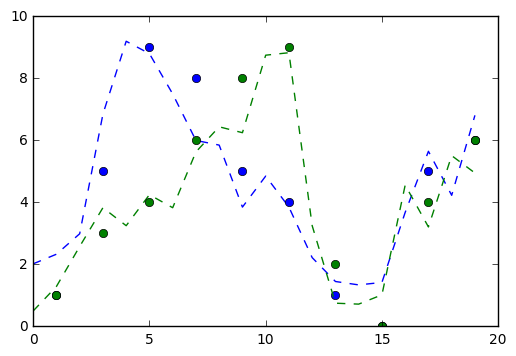

In [8]:
alphabet = range(10)
quantils = np.linspace(1./10, 1-1./10, 10-1)
gaus_percentils0 = norm.ppf(quantils)
gaus_result0 = paa_to_alphabet(transform2[0,:], alphabet, gaus_percentils0)
gaus_percentils1 = norm.ppf(quantils)
gaus_result1 = paa_to_alphabet(transform2[1,:], alphabet, gaus_percentils1)
print "Sax transformation for the first signal : ", gaus_result0
print "Sax transformation for the second signal : ", gaus_result1

plt.plot(range(time_series.shape[1]), time_series[0,:], 'b--')
plt.plot(range(1,21,2),gaus_result0, 'bo')
plt.plot(range(time_series.shape[1]), time_series[1,:], 'g--')
plt.plot(range(1,21,2),gaus_result1, 'go')
plt.ylim([0,10])

Please note that the points are just a representation and some of them are taken together. Besides, we plot here the real datas just to have a good visulization, but points are computed on normalized data. 
So everything is good so far, but I'm sure you're telling yourself that we did here a strong assumption. And that's true, we assumed that our normalized data follows a gaussian distrbution. So we will compare our last results to the real distribution's percentils.

Sax transformation for the first signal :  [1 5 9 7 5 5 1 0 5 6]
Sax transformation for the second signal :  [1 3 4 6 8 9 2 1 5 7]


(0, 10)

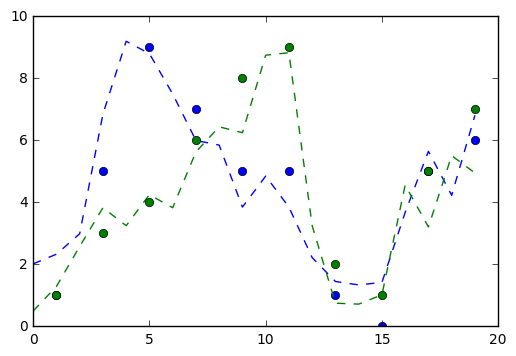

In [9]:
real_percentils0 = np.percentile(ztime_serie[0,:],quantils*100)
real_percentils1 = np.percentile(ztime_serie[1,:],quantils*100)
real_result0 = paa_to_alphabet(transform2[0,:], alphabet, real_percentils0)
real_result1 = paa_to_alphabet(transform2[1,:], alphabet, real_percentils1)
print "Sax transformation for the first signal : ", real_result0
print "Sax transformation for the second signal : ", real_result1

plt.plot(range(time_series.shape[1]), time_series[0,:], 'b--')
plt.plot(range(1,21,2),real_result0, 'bo')
plt.plot(range(time_series.shape[1]), time_series[1,:], 'g--')
plt.plot(range(1,21,2),real_result1, 'go')
plt.ylim([0,10])

We have almost the same result by using the gaussian distribution assumption. So let visualize why we have this strange behaviour.

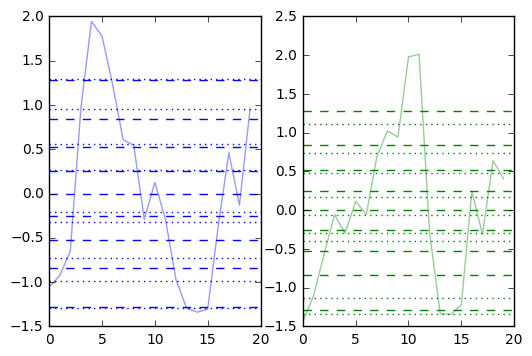

In [10]:
f, axarr = plt.subplots(1,2, sharey= False)
axarr[0].plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b', alpha = 0.4)
for gpercentil,rpercentil in zip(gaus_percentils0, real_percentils0):
    axarr[0].plot((0, ztime_serie.shape[1]), (gpercentil, gpercentil), 'b--')
    axarr[0].plot((0, ztime_serie.shape[1]), (rpercentil, rpercentil), 'b:')
axarr[1].plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g', alpha = 0.4)
for gpercentil,rpercentil in zip(gaus_percentils1, real_percentils1):
    axarr[1].plot((0, ztime_serie.shape[1]), (gpercentil, gpercentil), 'g--')
    axarr[1].plot((0, ztime_serie.shape[1]), (rpercentil, rpercentil), 'g:')

f.subplots_adjust(hspace=0.3)


+ Dashes lines represent gaussian percentils
+ Dots lines represent real distribution's percentil

We can note that we have slight changes between both type of percentils. That's the reason why we have really close results.
I'm sure you're telling yourself that we are concluding on dumb data. So what about having a look at the results of SAX on real EEG data ?

# STATIC SAX ON EGG DATA
Now that we know how SAX works, we are going to go faster on real EEG data.
The data used in this section come from UCI representing the action of opening or closing his eyes. You can download them on [EEG Eye State Data Set](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#). 

## Details about data we are using
+ Dataset obtained from a continuous EEG measurement.
+ EEG technology used: `Emotiv EEG Neuroheadset`. 
+ Duration: 117 seconds. 
+ Last column: Eye state detected using a camera and added manually. (1: eye-closed, 0: eye-opened)
+ Values in chronological order (from the top to the bottom of the dataset)
+ Since the dataset contains 14980 points, the frequency of measures is of 128 points per second, which is close to 10 times the [frequency of Beta wave](http://emedicine.medscape.com/article/1139332-overview#a2). 

Since the EEG headset used has 14 sensors, each time step corresponds of acquisition of 14 points. So excluding time we have a signal of 14 dimension. Each dimension contains it own information so we can neglect one during our EEG analysis. But here in order to understand and see how is working SAX on real data, we will use the seventh first dimensions of the signal.

In [21]:
data = np.genfromtxt("../data/EEG_Eye_State.arff", comments = "@", delimiter = ",")
data = data.T
eeg = data[:7,:]
test = clean_outliers(eeg, 1)
#X = eeg.drop(eeg.columns[-1],1)
#X = X.apply(clean_outlier)

NameError: global name 'ata' is not defined